In [1]:
import pandas as pd
import plotly as py
import numpy as np
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [2]:
def generateDiscreteColourScale(colour_set):
    #colour set is a list of lists
    colour_output = []
    num_colours = len(colour_set)
    divisions = 1./num_colours
    c_index = 0.
    # Loop over the colour set
    for cset in colour_set:
        num_subs = len(cset)
        sub_divisions = divisions/num_subs
        # Loop over the sub colours in this set
        for subcset in cset:
            colour_output.append((c_index,subcset))
            colour_output.append((c_index + sub_divisions-
                .001,subcset))
            c_index = c_index + sub_divisions
    colour_output[-1]=(1,colour_output[-1][1])
    return colour_output

In [3]:
savedir = '/glade/campaign/univ/urtg0006/Brendan/GGCMI_model_comp_figs/protein'

In [4]:
color_schemes = [
    ['#a50026','#d73027','#f46d43','#fdae61','#fee08b','#ffffbf','#ffffbf','#d9ef8b','#a6d96a','#66bd63','#1a9850','#006837']]
cscale = generateDiscreteColourScale(color_schemes)

In [6]:
maize = pd.read_excel(savedir + '/maize_dssat_saiminusssp.xlsx', usecols="A,B")
maize_top = pd.read_excel(savedir + '/maize_dssat_saiminusssp.xlsx', usecols="E,F")

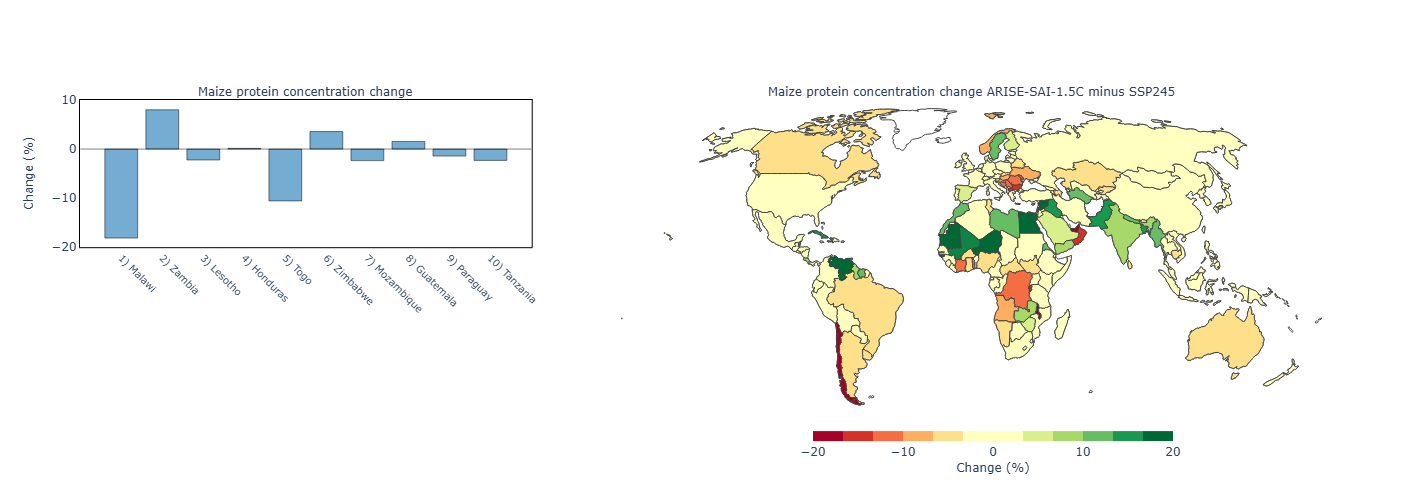

In [8]:
# Define subplots
fig = make_subplots(rows=2, cols=2,subplot_titles=("Maize protein concentration change","Maize protein concentration change ARISE-SAI-1.5C minus SSP245"),
                    specs=[[{"type": "bar"}, {"type": "choropleth","rowspan": 2}],
                            [{},None]],
                    row_heights=[0.4,0.4], column_widths=[0.6,1.0],
    vertical_spacing=0.08,  # Spacing between rows
    horizontal_spacing=0.05  # Spacing between columns
)
# Barplot
fig.add_trace(go.Bar(x=maize_top['nation-name.1'],y=maize_top['pchange.1'],marker_color='#74add1',marker=dict(line=dict(width=0.5, color='black')),showlegend=False),row=1, col=1)
# Choropleth
fig.add_trace(
    go.Choropleth(locations=maize['nation-name'],colorscale=cscale,z=maize["pchange"],
locationmode = "country names", zmin=-20, zmax=20,colorbar = {'title': {'text': 'Change (%)', 'font': {'size': 12}}}), row = 1, col = 2)
# Update layout
fig.update_geos(projection_type="robinson",lataxis_range=[-60,80])

fig.update_traces(colorbar_title_side='bottom',colorbar_orientation='h',colorbar_thickness=10, colorbar_x=0.72,colorbar_y=-0.2,colorbar_len=0.3, row=1, col=2)

fig.update_yaxes(title_font=dict(size=12),title_text="Change (%)", row=1, col=1)

fig.update_xaxes(tickangle=45)
fig.update_xaxes(tickfont_size=10, row=1, col=1)
fig.update_layout(width=1400, height=500)
fig.update_layout(plot_bgcolor='white')
fig.update_layout(
    shapes=[
        # Line for Maize plot (row 1, col 1)
        dict(
            type="line",
            x0=-1, x1=10,  # Start and end of the line along the x-axis
            y0=0, y1=0,  # Line position at y=0
            line=dict(color="black", width=0.5),
            xref="x1", yref="y1"  # Define the correct x and y axes for this subplot
        )
    ]
)
fig.update_geos(
    visible=False, resolution=110,
    showcountries=True
)
fig.update_yaxes(range=[-20, 10], row=1, col=1)

fig.update_xaxes(showline = True, linecolor = 'black', linewidth = 1, row = 1, col = 1, mirror = True)
fig.update_yaxes(showline = True, linecolor = 'black', linewidth = 1, row = 1, col = 1, mirror = True)

fig.update_annotations(font_size=12)

In [10]:
fig.write_image(savedir+"/Nature_ED2_DSSAT.png",scale=1)